<a href="https://colab.research.google.com/github/JuanaPinzonR/Proyecto_Computacional/blob/main/M%C3%A9tricas_de_desempe%C3%B1o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Métricas de Desempeño**

*Valentina Naranjo*  58000385

# Importación Datos

In [1]:
import pandas as pd

excel_path = "/content/Obs_Sim.xlsx"
df = pd.read_excel(excel_path)

df.head()

,Fecha,Qobs,Qsim1,Qsim2
0,1984-01-01,399.100000,395.000000,399.100000
1,1984-02-01,383.541887,386.072562,383.541887
2,1984-03-01,296.737445,296.809249,296.737445
3,1984-04-01,402.279314,406.060687,402.279314
4,1984-05-01,405.470973,407.746351,405.470973


# Implementación de Métricas

In [5]:
import numpy as np

**RMSE – Root Mean Squared Error**

 Calcula la Raíz del Error Cuadrático Medio (RMSE) entre valores observados y simulados.

   Parámetros:
  obs: Serie de valores observados.
   sim: Serie de valores simulados.

   Retorna:
  El valor del RMSE, representando el error cuadrático medio entre las dos series.

In [6]:
def rmse(obs, sim):

    if len(obs) != len(sim):
        raise ValueError("Las series deben tener la misma longitud.")
    return np.sqrt(np.mean((np.array(obs) - np.array(sim)) ** 2))


 **R² – Coeficiente de determinación**

 Calcula el Coeficiente de Determinación (R²) entre valores observados y simulados.

   Parámetros:
   obs: Serie de valores observados.
  sim: Serie de valores simulados.

   Retorna:
  El valor de R², indicando qué proporción de la varianza de los observados es explicada por los simulados.


In [7]:

def rsqr(obs, sim):

    if len(obs) != len(sim):
        raise ValueError("Las series deben tener la misma longitud.")
    obs = np.array(obs)
    sim = np.array(sim)
    ss_res = np.sum((obs - sim) ** 2)
    ss_tot = np.sum((obs - np.mean(obs)) ** 2)
    return 1 - (ss_res / ss_tot)


**ME – Error Medio**


  Calcula el Error Medio  entre valores observados y simulados.

  Parámetros:
  obs : Serie de valores observados.
   sim : Serie de valores simulados.

  Retorna:
  El valor del ME, representando el sesgo promedio del modelo.

In [8]:
def mean_error(obs, sim):

    if len(obs) != len(sim):
        raise ValueError("Las series deben tener la misma longitud.")
    return np.mean(np.array(sim) - np.array(obs))


**PI – Índice de Persistencia**

   Calcula el Índice de Persistencia (PI) entre valores observados y simulados.

  Parámetros:
  obs : Serie de valores observados.
      sim : Serie de valores simulados.

   Retorna:
   
 El valor del PI, que compara el modelo con un modelo persistente de un paso.


In [9]:
def persistence_index(obs, sim):

    if len(obs) != len(sim):
        raise ValueError("Las series deben tener la misma longitud.")
    obs = np.array(obs)
    sim = np.array(sim)
    y_persist = np.roll(obs, 1)
    y_persist[0] = obs[0]
    ss_sim = np.sum((obs - sim) ** 2)
    ss_persist = np.sum((obs - y_persist) ** 2)
    return 1 - (ss_sim / ss_persist)


**PEP – Error porcentual en el pico**

  Calcula el Error Porcentual en el Pico (PEP) entre valores observados y simulados.

   Parámetros:
  obs : Serie de valores observados.
  sim : Serie de valores simulados.

  Retorna:  El valor del PEP en porcentaje, evaluando el error en el valor máximo observado.

In [10]:
def percent_error_in_peak(obs, sim):

    if len(obs) != len(sim):
        raise ValueError("Las series deben tener la misma longitud.")
    obs = np.array(obs)
    sim = np.array(sim)
    peak_obs = np.max(obs)
    peak_sim = sim[np.argmax(obs)]
    return 100 * np.abs((peak_obs - peak_sim) / peak_obs)


In [11]:
results_df

,Métrica,Qsim1,Qsim2
0,RMSE,13.441635,0.0
1,R²,0.991980,1.0
2,ME,1.703332,0.0
3,PI,0.987208,1.0
4,PEP,1.476872,0.0


# **Análisis**

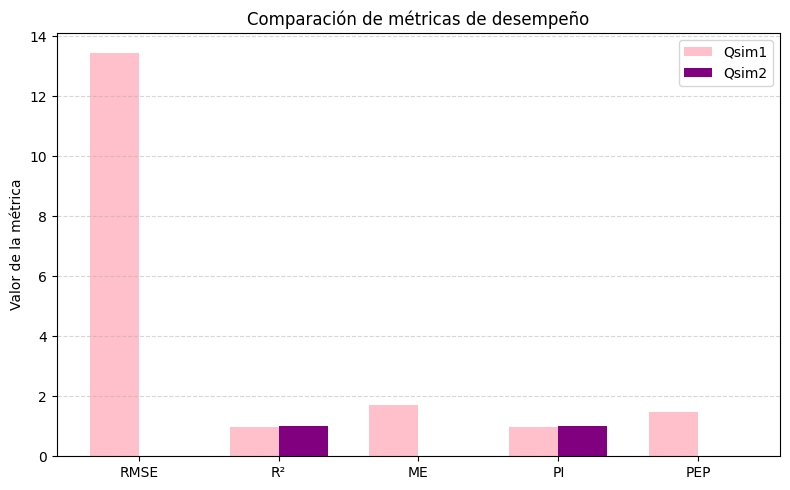

In [19]:
import matplotlib.pyplot as plt

results_df = pd.DataFrame({
    'Métrica': ['RMSE', 'R²', 'ME', 'PI', 'PEP'],
    'Qsim1': [13.441635, 0.991980, 1.703332, 0.987208, 1.476872],
    'Qsim2': [0.0, 1.0, 0.0, 1.0, 0.0]
})

fig, ax = plt.subplots(figsize=(8, 5))
x = results_df['Métrica']
qsim1 = results_df['Qsim1']
qsim2 = results_df['Qsim2']

width = 0.35
indices = range(len(x))

ax.bar([i - width/2 for i in indices], qsim1, width=width, label='Qsim1', color='pink')
ax.bar([i + width/2 for i in indices], qsim2, width=width, label='Qsim2', color='purple')

ax.set_ylabel('Valor de la métrica')
ax.set_title('Comparación de métricas de desempeño')
ax.set_xticks(indices)
ax.set_xticklabels(x)
ax.legend()
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)


# **Conclusiones**

Los resultados obtenidos muestran una clara diferencia en el desempeño de las dos simulaciones frente a los valores observados. La serie Qsim2 presenta un ajuste perfecto en todas las métricas, con valores ideales de RMSE = 0, R² = 1, ME = 0, PI = 1 y PEP = 0%, lo cual indica que esta serie es idéntica a los datos observados. En contraste, Qsim1 muestra un desempeño también muy alto, aunque no perfecto. El valor de RMSE (13.44) revela una dispersión promedio moderada respecto a los observados, mientras que el R² de 0.99 muestra que la mayor parte de la variabilidad de los datos es explicada por la simulación. El sesgo positivo (ME = 1.70) indica una ligera sobreestimación sistemática por parte del modelo. El índice de persistencia (PI = 0.987) confirma que Qsim1 supera el desempeño de un modelo persistente de un paso, y el error porcentual en el pico (PEP = 1.48%) sugiere una alta precisión en la estimación de eventos extremos. En conjunto, Qsim1 demuestra una calidad aceptable para propósitos operativos, aunque claramente inferior a Qsim2.

**Referencias:**

Domínguez, E. A., Dawson, C. W., Ramírez, A., & Abrahart, R. J. (2010). The search for orthogonal hydrological modelling metrics: A case study of twenty monitoring stations in Colombia. Journal of Hydroinformatics, Manuscript HYDRO-D-09-00016R2.